In [110]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [288]:
FOLDER = '../../data_handson/champs-scalar-coupling/'
os.listdir(FOLDER)

['scalar_coupling_contributions.csv',
 'mulliken_charges.csv',
 'structures.csv',
 'test.csv',
 'structures.zip',
 'train.csv',
 'magnetic_shielding_tensors.csv',
 'dipole_moments.csv',
 'sample_submission.csv',
 'potential_energy.csv']

## load all files as pandas dataframe

In [552]:
df_mulliken_charges = pd.read_csv(FOLDER + 'mulliken_charges.csv')
df_sample =  pd.read_csv(FOLDER + 'sample_submission.csv')
df_magnetic_shielding_tensors = pd.read_csv(FOLDER + 'magnetic_shielding_tensors.csv')
df_train = pd.read_csv(FOLDER + 'train.csv')
df_test = pd.read_csv(FOLDER + 'test.csv')
df_dipole_moments = pd.read_csv(FOLDER + 'dipole_moments.csv')
df_potential_energy = pd.read_csv(FOLDER + 'potential_energy.csv')
df_structures = pd.read_csv(FOLDER + 'structures.csv')
df_scalar_coupling_contributions = pd.read_csv(FOLDER + 'scalar_coupling_contributions.csv')

## distribution of scaler coupling constant for each coupling type

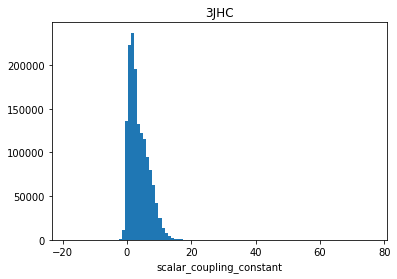

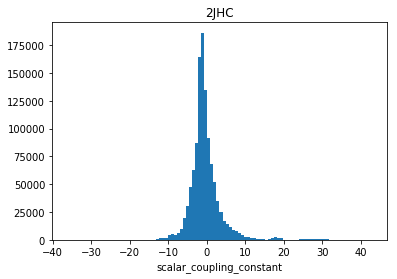

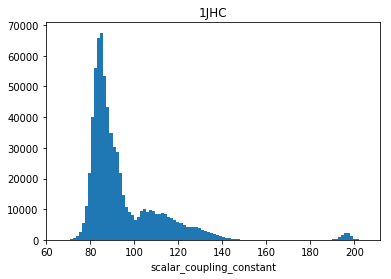

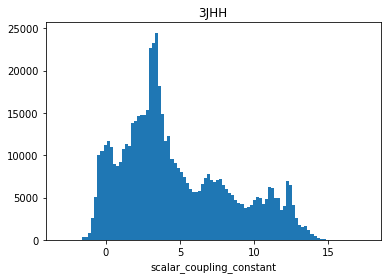

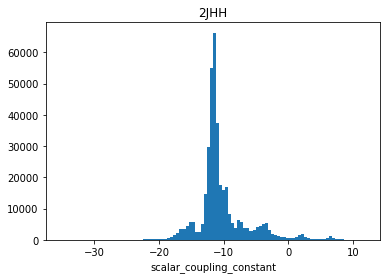

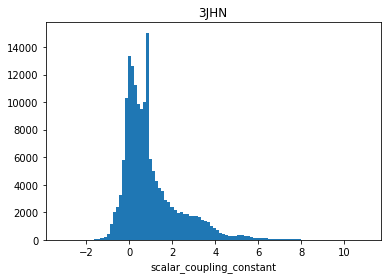

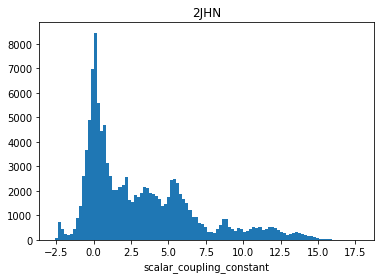

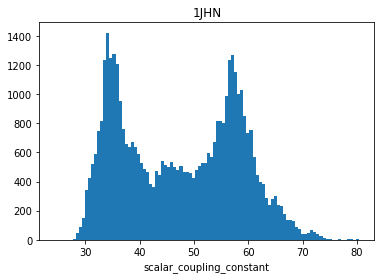

In [126]:
coupling_type = df_train['type'].value_counts().index
for c in coupling_type:
    sc = df_train[df_train['type']==c]['scalar_coupling_constant'].values.astype(np.float32)
    plt.hist(sc, bins=100)
    plt.xlabel('scalar_coupling_constant')
    plt.title('{}'.format(c))
    plt.show()

## distance

In [257]:
name = 'dsgdb9nsd_000011'
temp_train = df_train[df_train['molecule_name'] == name]
temp_structure = df_structures[df_structures['molecule_name'] == name]
atom0  = temp_train['atom_index_0'].values
atom1  = temp_train['atom_index_1'].values
dist_list = []
for i in range(temp_train.shape[0]):
    loc0 = temp_structure.query('atom_index == "{}"'.format(atom0[i]))[['x', 'y', 'z']].values.reshape(-1)
    loc1 = temp_structure.query('atom_index == "{}"'.format(atom1[i]))[['x', 'y', 'z']].values.reshape(-1)
    dist = sum((loc0 - loc1)**2)**0.5
    dist_list.append(dist)
temp_train['dist'] = dist_list

In [275]:
temp_train.query('type == "2JHC"')

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,dist
84,84,dsgdb9nsd_000011,3,1,2JHC,-6.56689,2.151183
89,89,dsgdb9nsd_000011,4,1,2JHC,-3.78105,2.140879
93,93,dsgdb9nsd_000011,5,1,2JHC,-3.77172,2.141580
95,95,dsgdb9nsd_000011,6,0,2JHC,31.77360,2.214047


## check data

In [286]:
df_mulliken_charges.query('molecule_name  == "dsgdb9nsd_000011"')

,molecule_name,atom_index,mulliken_charge
42,dsgdb9nsd_000011,0,-0.450295
43,dsgdb9nsd_000011,1,0.172068
44,dsgdb9nsd_000011,2,-0.225967
45,dsgdb9nsd_000011,3,0.145454
46,dsgdb9nsd_000011,4,0.143237
47,dsgdb9nsd_000011,5,0.143266
48,dsgdb9nsd_000011,6,0.072238


In [313]:
df_structures.query('molecule_name  == "dsgdb9nsd_000011"')

,molecule_name,atom_index,atom,x,y,z
46,dsgdb9nsd_000011,0,C,-0.002945,1.509914,0.008673
47,dsgdb9nsd_000011,1,C,0.026083,0.003276,-0.037459
48,dsgdb9nsd_000011,2,O,0.942288,-0.655070,-0.456826
49,dsgdb9nsd_000011,3,H,0.922788,1.926342,-0.391466
50,dsgdb9nsd_000011,4,H,-0.862015,1.878525,-0.564795
51,dsgdb9nsd_000011,5,H,-0.150506,1.843934,1.042891
52,dsgdb9nsd_000011,6,H,-0.894430,-0.486434,0.357749


In [283]:
df_dipole_moments.query('molecule_name  == "dsgdb9nsd_000011"')

,molecule_name,X,Y,Z
8,dsgdb9nsd_000011,2.3605,1.0119,0.0004


In [284]:
df_potential_energy.query('molecule_name  == "dsgdb9nsd_000011"')

,molecule_name,potential_energy
8,dsgdb9nsd_000011,-153.843


In [285]:
df_scalar_coupling_contributions.query('molecule_name  == "dsgdb9nsd_000011"')

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
83,dsgdb9nsd_000011,3,0,1JHC,86.657300,0.226042,0.821762,0.578633
84,dsgdb9nsd_000011,3,1,2JHC,-6.167880,0.013447,-0.218375,-0.194087
85,dsgdb9nsd_000011,3,4,2JHH,-10.230600,0.329742,2.522750,-2.909880
86,dsgdb9nsd_000011,3,5,2JHH,-10.283700,0.330377,2.520420,-2.905390
87,dsgdb9nsd_000011,3,6,3JHH,7.790410,-0.033392,2.038100,-3.003080
88,dsgdb9nsd_000011,4,0,1JHC,80.670900,0.174409,1.099370,0.569410
89,dsgdb9nsd_000011,4,1,2JHC,-3.788060,0.162387,-0.038622,-0.116760
90,dsgdb9nsd_000011,4,5,2JHH,-17.748300,0.384387,2.436450,-2.650080
91,dsgdb9nsd_000011,4,6,3JHH,0.215153,0.084005,0.618686,-0.719418
92,dsgdb9nsd_000011,5,0,1JHC,80.669900,0.173975,1.099950,0.569289


In [287]:
df_magnetic_shielding_tensors.query('molecule_name  == "dsgdb9nsd_000011"')

,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
42,dsgdb9nsd_000011,0,173.3190,-34.9358,-0.0612,-19.2913,158.4710,0.0146,-0.0469,0.0349,147.6510
43,dsgdb9nsd_000011,1,-13.8561,22.9944,-0.0122,20.5661,-79.9195,0.0060,-0.0157,-0.0052,104.2300
44,dsgdb9nsd_000011,2,-714.2770,-219.5340,-0.2168,-243.8030,-570.5120,-0.1104,-0.2102,-0.1141,357.6680
45,dsgdb9nsd_000011,3,28.5430,-3.5878,-0.0020,1.1520,33.2123,0.0032,0.0007,0.0080,27.7187
46,dsgdb9nsd_000011,4,29.0037,1.7750,-1.4893,-0.2322,28.9540,-0.2294,-2.5990,-1.6474,30.9785
47,dsgdb9nsd_000011,5,29.0021,1.7666,1.4946,-0.2313,28.9452,0.2266,2.6022,1.6381,30.9782
48,dsgdb9nsd_000011,6,22.3306,-0.3791,-0.0005,-4.5186,21.8153,0.0004,-0.0018,-0.0002,20.2500


## find correspond H by cosine similar 

In [372]:
def cos_sim_matrix(matrix):
    """
    item-feature 行列が与えられた際に
    item 間コサイン類似度行列を求める関数
    """
    d = matrix @ matrix.T  # item-vector 同士の内積を要素とする行列

    # コサイン類似度の分母に入れるための、各 item-vector の大きさの平方根
    norm = (matrix * matrix).sum(axis=1, keepdims=True) ** .5

    # それぞれの item の大きさの平方根で割っている（なんだかスマート！）
    return d / norm / norm.T

In [608]:
def distance_matrix(df_structures, molecule_name,  num_atom):
    '''
    compute distances of n-nearest atoms
    input:
        df_structures: load 'structures.csv'
        molecule_name
        num_atom: number of picked up atoms (H, C, N, O, F)
        
    output:
        distances of n-nearest atom (H, C, N, O, F) corresponed to each atom
    '''
    df = df_structures.query('molecule_name == "{}" '.format(molecule_name))
    atoms = ['H', 'C', 'N', 'O', 'F']
    
    idx = df['atom_index'].values
    dist_arr = np.zeros([len(idx), num_atom*5])

    for i, origin in enumerate(idx):
        # this location is an origin of distance
        if df.query('atom_index == "{}"'.format(1))['atom'].values in ['O;','F']:
            break
        loc0 = df.query('atom_index == "{}"'.format(origin))[['x','y','z']].values.reshape(-1)

        # compute distances for other atoms
        dist_list = []
        for j, atom in enumerate(atoms):
            atom_idx = df.query('atom == "{}"'.format(atom))['atom_index'].values
            if len(atom_idx) == 0:
                continue
            elif num_atom > len(atom_idx) - 1:
                temp_num_atom = len(atom_idx)
            else:
                temp_num_atom = num_atom
            dist_list = []
            for k, a in enumerate(atom_idx):
                if k > temp_num_atom:
                    break
                loc1 = df.query('atom_index == "{}"'.format(a))[['x','y','z']].values.reshape(-1)
                dist_list.append(sum((loc0 - loc1)**2))
            slice_start = j * num_atom
            slice_end = slice_start + k-1
            sorted_arr = np.sort(np.array(dist_list))[1:k]
            dist_arr[i, slice_start:slice_end] = 1/sorted_arr
            
    return dist_arr

In [609]:
mols = df_train['molecule_name'].value_counts().index

In [610]:
mat.shape

(27, 15)

In [611]:
i = 30
mat = distance_matrix(df_structures, mols[i],  3)

In [612]:
mat

array([[0.83489757, 0.83434337, 0.21582695, 0.42515722, 0.14458524,
        0.10381296, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.21237729, 0.20793125, 0.2077945 , 0.42515722, 0.4163653 ,
        0.15653456, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.1169972 , 0.11601308, 0.07910522, 0.42082051, 0.4163653 ,
        0.14458524, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.08313372, 0.08120248, 0.05982968, 0.42082051, 0.15653456,
        0.10381296, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.12256082, 0.07794674, 0.05914421, 0.15479588, 0.15445063,
        0.10120482, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


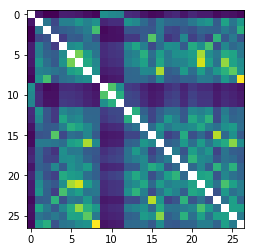

In [613]:
cos_sim = cos_sim_matrix(mat)
out = - np.log(1 - cos_sim  - 1e-15)
plt.imshow(out)

In [614]:
mat[0]

array([0.83489757, 0.83434337, 0.21582695, 0.42515722, 0.14458524,
       0.10381296, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [615]:
temp_train = df_train.query('molecule_name == "{}"'.format(mols[i]))

In [616]:
i = 0
atom0 = temp_train['atom_index_0'].values[i]
atom1 = temp_train['atom_index_1'].values[i]
vec0 = mat[atom0]
vec1 = mat[atom1]

In [617]:
np.log(1- sum(vec0 * vec1) / sum(vec0**2)**0.5 / sum(vec1**2)**0.5)

-4.1842833006196685